In [1]:
import json
import pandas as pd
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T

In [2]:
path = 'dataset.json'
with open(path) as f:
    data_set = json.load(f)
data_paths = data_set['training']
nii_img = nib.load(data_paths[0]['image'])
nii_data = nii_img.get_fdata()

In [3]:
nii_data = np.transpose(nii_data, [2, 0, 1])
nii_data.shape

(252, 512, 512)

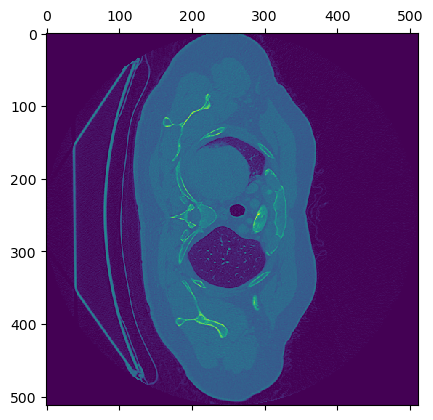

In [10]:
a = nii_data - nii_data.min()
a /= a.max()
plt.matshow(a[200])
plt.show()

resize = T.Resize(size=(256, 256))
a = torch.from_numpy(a)
b = resize(a)

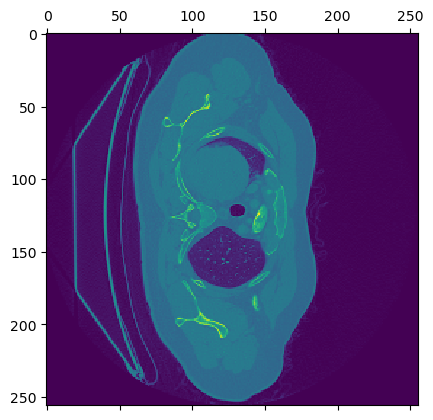

In [12]:
plt.matshow(b.numpy()[200])

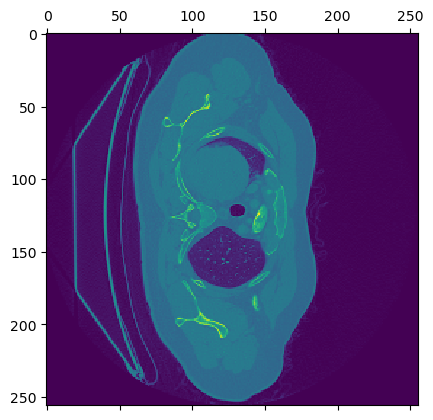

In [34]:
import torch.nn.functional as F
a_pooled = F.avg_pool2d(a, 2, (2, 2))
plt.matshow(a_pooled.numpy()[200])

In [7]:
nii_img_label = nib.load(data_paths[0]['label'])
nii_data_label = nii_img_label.get_fdata()
nii_data_label = np.transpose(nii_data_label, [2, 0, 1])
nii_data_label = np.ma.masked_where(nii_data_label < 1.0, nii_data_label) 
nii_data_label.shape

(252, 512, 512)

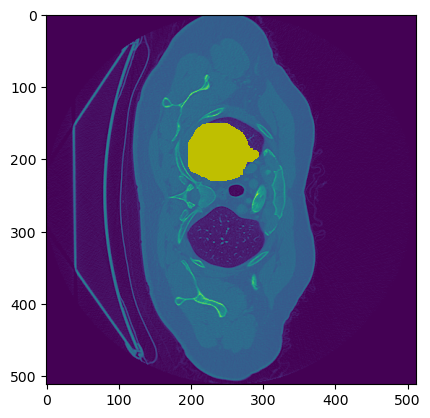

In [8]:
from matplotlib.colors import ListedColormap
plt.imshow(a[200])
cmap = ListedColormap(['y'])
plt.imshow(nii_data_label[200], cmap=cmap)
plt.show()